In [1]:
import numpy as np
from sklearn.datasets import load_iris
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
data = load_iris()

In [2]:
#随机打乱数据集
Range = np.random.randint(0,150,150)
X  = data ['data']
Y  = data['target']
X,Y = X[Range],Y[Range]

In [36]:
#定义谱聚类 
class spectral:
    def __init__(self,data,num,gamma=1/np.sqrt(2),cluster=3):
        self.W = None
        self.D = None
        self.L = None
        self.temp_W = None
        self.data = data
        self.num = num
        self.gamma = gamma
    
    def normalization(self):
        self.data = np.array([[(x-min(data))/(max(data)-min(data)) for x in data]for data in self.data])
    
    def fit(self):
        self.normalization()
        N = len(self.data)
        self.W = np.zeros([N,N])
        for i in range(N):
            for j in range(N):
                self.W[i][j] = np.exp(-np.sum(np.square(self.data[i]-self.data[j]))/(2*self.gamma*self.gamma))#用高斯核函数计算结点之前的相似度
        def KNN_1(row,num):
            idx = np.argsort(row)
            idx = idx[-num:]
            out = np.zeros(150)
            for i in idx:
                out[i] = row[i]
            return out
        
        def KNN_2(row,num):
            idx = np.argsort(row)
            idx = idx[-num:]
            out = np.zeros(150)
            out[idx] = 1
            return out
            
            
        self.W = np.array([KNN_1(data,self.num)  for data in self.W])#生成带权的邻接矩阵
        self.temp_W = np.array([ KNN_2(data,self.num) for data in self.W])#二值化邻接矩阵
        self.D = np.diag(np.sum(self.W,axis=1))#生成度矩阵
        self.L = self.D - self.W#生成拉普拉斯矩阵
        


In [84]:
#初始化对象
a = spectral(X,90)
a.fit()

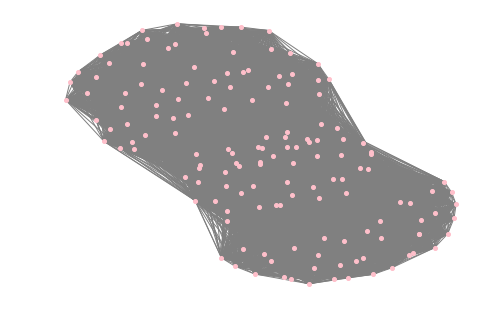

In [85]:
edges = list()
for i in range(150):
    for j in range(150):
        if a.temp_W[i][j] == 1:
            edges.append(tuple([i,j]))
G = nx.Graph()
G.add_edges_from(edges)
nx.draw(G,edge_color='gray',node_color='pink',node_size=16)
plt.show()
#可视化邻接矩阵

In [43]:
#用pca降维提取150个特征向量
pca = PCA(n_components=150,random_state=3)
pca.fit(a.L)
x = pca.components_.T

PCA(copy=True, iterated_power='auto', n_components=150, random_state=3,
  svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
#用KMeans生成新的簇
clf = KMeans(n_clusters=3, random_state=1)

In [47]:
#做一个替换，将真实标签与聚类后标签相对应
y = clf.fit_predict(x)
for i in range(len(y)):
    if y[i] == 1:
        y[i] = 0
    elif y[i] == 0:
        y[i] = 2
    elif y[i] == 2:
        y[i] = 1

In [76]:
#生成节点列表
node = dict()
for i in range(0,150):
    node[i] = np.array(X[i][0:2])

In [78]:
#生成边的列表
edges = list()
idx1 = np.where(y == 0)
idx2 = np.where(y == 1)
idx3 = np.where(y == 2)
for i in idx1[0]:
    for j in idx1[0]:
        edges.append(tuple([i,j]))
for i in idx2[0]:
    for j in idx2[0]:
        edges.append(tuple([i,j]))
for i in idx3[0]:
    for j in idx3[0]:
        edges.append(tuple([i,j]))

In [81]:
nodelist1 = list(idx1[0])
nodelist2 = list(idx2[0])
nodelist3 = list(idx3[0])

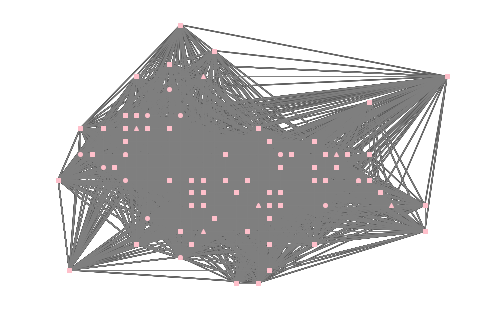

In [86]:
#可视化聚类后的连接图图
G = nx.Graph()
G.add_edges_from(edges)
nx.draw(G,pos=node,node_color='pink',nodelist=nodelist1,node_size=16,node_shape='^')
nx.draw(G,pos=node,node_color='pink',nodelist=nodelist2,node_size=16,node_shape='o')
nx.draw(G,pos=node,node_color='pink',nodelist=nodelist3,edge_color='gray',node_size=16,node_shape='s')